In [ ]:
import warnings
warnings.simplefilter(action='ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
from missingpy import MissForest
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


In [2]:
df_ForestImputer = pd.read_csv('../Train_music_ForestImputer.csv')
df_ForestImputer

,id,target,device_type,manufacturer_category,os_category,sim_count,tp_flag,lt,block_flag,days_exp,...,service_5_count_m3,service_6_count_m3,service_7_cost_m3,service_7_flag_m3,service_8_count_m3,income_brnd_cont_m3,data_type_1_m3,data_type_2_m3,data_type_3_m3,service_9_flag_m3
0,4.810120e+10,0.0,7.0,592.0,3.0,2.0,0.0,0.632435,0.0,108.0,...,0.0,0.0,0.0,0.0,0.0,19.971334,127.895751,716.420311,114.566613,1.0
1,4.810425e+10,0.0,7.0,1057.0,3.0,2.0,0.0,0.540345,0.0,330.0,...,0.0,0.0,0.0,0.0,0.0,10.894140,234.292876,80.144736,14.630618,1.0
2,4.811813e+09,0.0,7.0,1057.0,3.0,2.0,0.0,0.951582,0.0,344.0,...,0.0,0.0,0.0,0.0,0.0,9.894929,0.018959,0.000977,57.100249,1.0
3,4.810105e+10,0.0,7.0,745.0,3.0,2.0,0.0,0.659047,0.0,361.0,...,0.0,0.0,0.0,0.0,0.0,8.183337,189.579215,118.776836,53.537855,1.0
4,4.830019e+09,0.0,7.0,1057.0,3.0,2.0,0.0,0.926471,0.0,199.0,...,0.0,0.0,0.0,0.0,0.0,2.217369,534.214973,1989.913944,29.685412,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4.894477e+09,1.0,7.0,1057.0,3.0,2.0,0.0,0.707827,0.0,221.0,...,0.0,0.0,0.0,0.0,0.0,11.649066,522.172754,2286.497442,452.738112,1.0
19996,4.875985e+09,0.0,7.0,592.0,3.0,2.0,0.0,0.824135,0.0,355.0,...,0.0,0.0,0.0,0.0,0.0,2.159549,857.216847,5979.779220,265.482364,1.0
19997,4.811248e+09,0.0,7.0,728.0,3.0,1.0,0.0,0.924764,0.0,208.0,...,0.0,0.0,0.0,0.0,0.0,10.999666,196.408633,40.263622,0.071870,1.0
19998,4.896164e+09,0.0,7.0,1057.0,3.0,2.0,0.0,0.716732,0.0,324.0,...,0.0,0.0,0.0,0.0,0.0,14.756591,274.917012,28.008975,10.813313,1.0


Видим, что классы несбалансированы и это проблема.

In [3]:
X = df_ForestImputer.drop(['target'], axis=1)
y = df_ForestImputer.target

In [4]:
X.drop(['id'], axis=1, inplace=True)
X

,device_type,manufacturer_category,os_category,sim_count,tp_flag,lt,block_flag,days_exp,service_1_flag,service_1_count,...,service_5_count_m3,service_6_count_m3,service_7_cost_m3,service_7_flag_m3,service_8_count_m3,income_brnd_cont_m3,data_type_1_m3,data_type_2_m3,data_type_3_m3,service_9_flag_m3
0,7.0,592.0,3.0,2.0,0.0,0.632435,0.0,108.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,19.971334,127.895751,716.420311,114.566613,1.0
1,7.0,1057.0,3.0,2.0,0.0,0.540345,0.0,330.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.894140,234.292876,80.144736,14.630618,1.0
2,7.0,1057.0,3.0,2.0,0.0,0.951582,0.0,344.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.894929,0.018959,0.000977,57.100249,1.0
3,7.0,745.0,3.0,2.0,0.0,0.659047,0.0,361.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.183337,189.579215,118.776836,53.537855,1.0
4,7.0,1057.0,3.0,2.0,0.0,0.926471,0.0,199.0,1.0,25.0,...,0.0,0.0,0.0,0.0,0.0,2.217369,534.214973,1989.913944,29.685412,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7.0,1057.0,3.0,2.0,0.0,0.707827,0.0,221.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.649066,522.172754,2286.497442,452.738112,1.0
19996,7.0,592.0,3.0,2.0,0.0,0.824135,0.0,355.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.159549,857.216847,5979.779220,265.482364,1.0
19997,7.0,728.0,3.0,1.0,0.0,0.924764,0.0,208.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.999666,196.408633,40.263622,0.071870,1.0
19998,7.0,1057.0,3.0,2.0,0.0,0.716732,0.0,324.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.756591,274.917012,28.008975,10.813313,1.0


In [5]:
selector_50 = SelectKBest(f_classif, k=50)
selector_100 = SelectKBest(f_classif, k=100)
selector_50.fit(X, y)
selector_100.fit(X, y)
# Get columns to keep and create new dataframe with those only
cols_50 = selector_50.get_support(indices=True)
cols_100 = selector_100.get_support(indices=True)
df_new_50 = X.iloc[:,cols_50]
df_new_100 = X.iloc[:,cols_100]

In [6]:
df_new_50['target'] = y
df_new_50

,os_category,lt,is_obl_center,count_sms_source_5,vol_app_5,rr_act_type_3,rr_act_type_8,rr_gift_type_3,count_act_type_1,count_act_type_3,...,paym_count_m3,voice_onnet_out_day_work_dur_m3,voice_onnet_in_day_work_dur_m3,voice_omo_out_night_rest_count_m3,sms_in_count_m3,content_count_m3,service_7_flag_m3,data_type_1_m3,data_type_2_m3,target
0,3.0,0.632435,0.0,1.0,3.710730e+05,0.0,0.000000,0.0,1.000000,1.000000,...,0.0,13860.0,10498.0,0.0,15.0,14.0,0.0,127.895751,716.420311,0.0
1,3.0,0.540345,1.0,0.0,4.475127e+08,0.0,0.500000,0.0,4.000000,1.028571,...,1.0,360.0,2860.0,0.0,0.0,28.0,0.0,234.292876,80.144736,0.0
2,3.0,0.951582,0.0,3.0,2.293159e+06,2.0,1.833333,2.0,5.000000,4.000000,...,0.0,2700.0,1092.0,0.0,3.0,52.0,0.0,0.018959,0.000977,0.0
3,3.0,0.659047,0.0,0.0,8.941500e+04,0.0,0.000000,0.0,1.000000,1.000000,...,0.0,3420.0,1714.0,0.0,6.0,5.0,0.0,189.579215,118.776836,0.0
4,3.0,0.926471,0.0,1.0,2.869470e+05,0.0,0.000000,0.0,6.000000,1.000000,...,0.0,16380.0,15146.0,0.0,18.0,34.0,0.0,534.214973,1989.913944,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3.0,0.707827,0.0,0.0,8.465320e+05,0.0,0.000000,0.0,5.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,522.172754,2286.497442,1.0
19996,3.0,0.824135,1.0,2.0,2.059290e+08,0.0,0.000000,0.0,1.000000,1.057143,...,1.0,25200.0,23608.0,0.0,61.0,50.0,0.0,857.216847,5979.779220,0.0
19997,3.0,0.924764,1.0,0.0,1.526081e+08,0.0,0.000000,0.0,7.000000,2.000000,...,0.0,0.0,720.0,0.0,0.0,37.0,0.0,196.408633,40.263622,0.0
19998,3.0,0.716732,0.0,1.0,6.835147e+06,0.0,0.000000,0.0,1.057143,1.000000,...,1.0,41220.0,12369.0,2.0,103.0,34.0,0.0,274.917012,28.008975,0.0


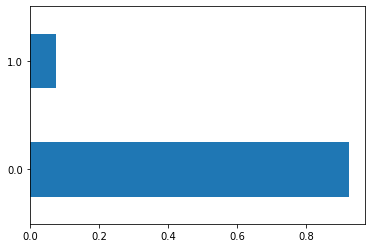

In [7]:
y.value_counts(normalize=True).plot(kind='barh')
plt.show()

Узнаем точное значение:

In [8]:
df_new_50['target'].value_counts(normalize=True)[0]

0.9252

In [9]:
df_new_100['target'] = y
df_new_100

,os_category,tp_flag,lt,service_3_flag,is_obl_center,count_sms_source_3,count_sms_source_5,count_sms_source_15,vol_app_5,vol_app_15,...,voice_omo_in_night_rest_count_m3,voice_out_uniq_count_m3,voice_in_uniq_count_m3,sms_in_count_m3,content_count_m3,service_7_flag_m3,data_type_1_m3,data_type_2_m3,data_type_3_m3,target
0,3.0,0.0,0.632435,0.0,0.0,0.0,1.0,0.0,3.710730e+05,5.084951e+06,...,0.0,74.0,79.0,15.0,14.0,0.0,127.895751,716.420311,114.566613,0.0
1,3.0,0.0,0.540345,0.0,1.0,0.0,0.0,2.0,4.475127e+08,2.260125e+07,...,0.0,3.0,6.0,0.0,28.0,0.0,234.292876,80.144736,14.630618,0.0
2,3.0,0.0,0.951582,0.0,0.0,0.0,3.0,0.0,2.293159e+06,2.661741e+07,...,0.0,24.0,14.0,3.0,52.0,0.0,0.018959,0.000977,57.100249,0.0
3,3.0,0.0,0.659047,0.0,0.0,0.0,0.0,0.0,8.941500e+04,1.457740e+07,...,0.0,9.0,5.0,6.0,5.0,0.0,189.579215,118.776836,53.537855,0.0
4,3.0,0.0,0.926471,0.0,0.0,0.0,1.0,0.0,2.869470e+05,1.415375e+06,...,0.0,64.0,70.0,18.0,34.0,0.0,534.214973,1989.913944,29.685412,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3.0,0.0,0.707827,0.0,0.0,0.0,0.0,0.0,8.465320e+05,5.656057e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,522.172754,2286.497442,452.738112,1.0
19996,3.0,0.0,0.824135,0.0,1.0,0.0,2.0,0.0,2.059290e+08,3.734388e+07,...,2.0,149.0,166.0,61.0,50.0,0.0,857.216847,5979.779220,265.482364,0.0
19997,3.0,0.0,0.924764,0.0,1.0,0.0,0.0,0.0,1.526081e+08,4.855550e+07,...,0.0,0.0,3.0,0.0,37.0,0.0,196.408633,40.263622,0.071870,0.0
19998,3.0,0.0,0.716732,0.0,0.0,0.0,1.0,0.0,6.835147e+06,2.161795e+08,...,4.0,145.0,145.0,103.0,34.0,0.0,274.917012,28.008975,10.813313,0.0


Посмотрим матрицу корреляций признаков с таргетом.

In [10]:
corrs = df_new_100.corr().values
ranks = (df_new_100.columns[:-1][-corrs[:-1,-1].argsort()]).tolist()

In [11]:
df_ForestImputer.corr()

,id,target,device_type,manufacturer_category,os_category,sim_count,tp_flag,lt,block_flag,days_exp,...,service_5_count_m3,service_6_count_m3,service_7_cost_m3,service_7_flag_m3,service_8_count_m3,income_brnd_cont_m3,data_type_1_m3,data_type_2_m3,data_type_3_m3,service_9_flag_m3
id,1.000000,0.156947,-0.032080,-0.015518,-0.018936,-0.069124,-0.138697,-0.790306,0.039259,-0.046590,...,-0.072241,-0.044665,-0.032133,-0.027612,NaN,0.043289,0.091897,0.127901,0.078858,NaN
target,0.156947,1.000000,0.013380,0.003357,-0.046069,-0.005176,-0.042697,-0.189337,-0.032242,0.014250,...,-0.003481,0.012385,0.032691,0.047074,NaN,0.022521,0.044278,0.055231,0.042064,NaN
device_type,-0.032080,0.013380,1.000000,0.086637,-0.345438,0.233784,0.009594,0.040131,-0.024041,0.031706,...,0.058626,0.020337,-0.006530,-0.009824,NaN,0.017563,0.056744,0.089831,0.075816,NaN
manufacturer_category,-0.015518,0.003357,0.086637,1.000000,-0.384063,0.321904,-0.005045,0.024819,-0.005663,-0.026401,...,-0.023984,0.000984,-0.006489,-0.001439,NaN,-0.004054,-0.038960,-0.038348,-0.027558,NaN
os_category,-0.018936,-0.046069,-0.345438,-0.384063,1.000000,-0.385203,0.005983,0.022017,0.001973,0.019167,...,0.034022,-0.001079,0.015488,0.011573,NaN,-0.008836,0.056884,0.019467,0.022110,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
income_brnd_cont_m3,0.043289,0.022521,0.017563,-0.004054,-0.008836,-0.010774,-0.004832,-0.053666,0.016636,-0.027253,...,0.006883,0.012263,0.042652,0.037542,NaN,1.000000,0.051347,0.038621,0.030858,NaN
data_type_1_m3,0.091897,0.044278,0.056744,-0.038960,0.056884,-0.051164,-0.032430,-0.079376,-0.021739,0.087721,...,0.144989,0.046892,0.047739,0.050365,NaN,0.051347,1.000000,0.311978,0.255415,NaN
data_type_2_m3,0.127901,0.055231,0.089831,-0.038348,0.019467,-0.021842,-0.070389,-0.105658,-0.036078,0.099028,...,0.172858,0.069165,0.007364,0.014120,NaN,0.038621,0.311978,1.000000,0.461050,NaN
data_type_3_m3,0.078858,0.042064,0.075816,-0.027558,0.022110,-0.017362,-0.044752,-0.069317,-0.031422,0.077060,...,0.121866,0.034988,0.020687,0.021229,NaN,0.030858,0.255415,0.461050,1.000000,NaN


В нашем датасете есть признаки, которые являюся категориальными переменными: os_category, manufacturer_category, device_type. Сделаем для них get_dummies, то есть переведем из категориального в dummy/indicator variables.

In [12]:
df_new_50_gd = pd.get_dummies(df_new_50, columns=['os_category'])
df_new_50_gd.head()

,lt,is_obl_center,count_sms_source_5,vol_app_5,rr_act_type_3,rr_act_type_8,rr_gift_type_3,count_act_type_1,count_act_type_3,count_act_type_7,...,os_category_15.0,os_category_16.0,os_category_17.0,os_category_18.0,os_category_20.0,os_category_24.0,os_category_25.0,os_category_26.0,os_category_27.0,os_category_28.0
0,0.632435,0.0,1.0,3.710730e+05,0.0,0.000000,0.0,1.0,1.000000,1.0,...,0,0,0,0,0,0,0,0,0,0
1,0.540345,1.0,0.0,4.475127e+08,0.0,0.500000,0.0,4.0,1.028571,4.0,...,0,0,0,0,0,0,0,0,0,0
2,0.951582,0.0,3.0,2.293159e+06,2.0,1.833333,2.0,5.0,4.000000,5.0,...,0,0,0,0,0,0,0,0,0,0
3,0.659047,0.0,0.0,8.941500e+04,0.0,0.000000,0.0,1.0,1.000000,1.0,...,0,0,0,0,0,0,0,0,0,0
4,0.926471,0.0,1.0,2.869470e+05,0.0,0.000000,0.0,6.0,1.000000,6.0,...,0,0,0,0,0,0,0,0,0,0


Отделим таргет.

In [13]:
y=df_new_50['target']
y1=df_new_50_gd['target']

Далее проведем стандартизацию(масштабирование), чтобы не получилось так, что один признак влияет на таргет своим большим абсолюным значение значительно больше чем другие.

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df_new_50.drop(['target'], axis=1))
X1 = scaler.fit_transform(df_new_50_gd.drop(['target'], axis=1))

In [15]:
print(X[:5])

[[-0.49491972 -1.00193147 -0.89407506  0.31344398 -0.30141439 -0.30118712
  -0.38001605 -0.24942078 -1.12466626 -0.42523748 -1.11645449 -0.87436227
  -0.54245731 -1.11409178 -0.58664647 -0.17345223 -0.68728454 -0.71368811
   0.08845683 -0.27347791 -0.75531673 -0.13782204 -0.15066523 -0.00758932
  -0.41102072 -0.34602759 -0.30628257 -0.2352638  -0.58225787 -0.32581329
  -0.15299773  0.45831358 -0.39433523 -0.6884526  -0.15155991 -0.05917486
  -0.44369288 -0.35156306  0.29522767 -0.60183003  0.67966426 -0.73589743
   0.17417453  0.15925445 -0.37198629 -0.31544607 -0.75331121 -0.15172515
  -0.4140771  -0.26601647]
 [-0.49491972 -1.5903347   1.11847432 -0.84821566 -0.14134574 -0.30118712
   0.82632941 -0.24942078 -0.46631145 -0.38940372 -0.38144205 -0.93620733
  -0.39560035  0.21515212 -0.58664647 -0.17345223 -0.68728454 -0.71368811
  -0.66861009 -0.51359032 -0.5163865  -0.13782204 -0.15066523 -0.0193676
  -0.36227142 -0.37083274 -0.30628257  0.34792041 -0.59895825 -0.38998194
  -0.1529977

In [16]:
print(X1[:5])

[[-1.00193147 -0.89407506  0.31344398 -0.30141439 -0.30118712 -0.38001605
  -0.24942078 -1.12466626 -0.42523748 -1.11645449 -0.87436227 -0.54245731
  -1.11409178 -0.58664647 -0.17345223 -0.68728454 -0.71368811  0.08845683
  -0.27347791 -0.75531673 -0.13782204 -0.15066523 -0.00758932 -0.41102072
  -0.34602759 -0.30628257 -0.2352638  -0.58225787 -0.32581329 -0.15299773
   0.45831358 -0.39433523 -0.6884526  -0.15155991 -0.05917486 -0.44369288
  -0.35156306  0.29522767 -0.60183003  0.67966426 -0.73589743  0.17417453
   0.15925445 -0.37198629 -0.31544607 -0.75331121 -0.15172515 -0.4140771
  -0.26601647 -0.24471088  0.60908937 -0.04003204 -0.01732311 -0.00707124
  -0.05797638 -0.14752479 -0.03744279 -0.00707124 -0.06571583 -0.02550339
  -0.01871156 -0.08545728 -0.32625064 -0.28944062]
 [-1.5903347   1.11847432 -0.84821566 -0.14134574 -0.30118712  0.82632941
  -0.24942078 -0.46631145 -0.38940372 -0.38144205 -0.93620733 -0.39560035
   0.21515212 -0.58664647 -0.17345223 -0.68728454 -0.71368811 

Разделим датасет на train i valid

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)


Обучим алгоритм классификации.

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [19]:
y_pred = knn.predict(X_valid)

In [20]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
print(confusion_matrix(y_valid, y_pred))

[[4596   53]
 [ 341   10]]


Датасет с get_dummies:

In [21]:
X1_train, X1_valid, y1_train, y1_valid = train_test_split(X1, y1, test_size=0.25, random_state=42)
knn.fit(X1_train, y1_train)
y1_pred = knn.predict(X1_valid)
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
print(confusion_matrix(y1_valid, y1_pred))

[[4606   43]
 [ 341   10]]


Результат довольно хороший. Далее будем использовать датасет с get_dummies.

# Валидация на отложенном датасете

In [22]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_valid, y_pred))

0.9212


In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y1_valid, y1_pred))

0.9232


Все казалось бы очень хорошо, но на самом деле нет. Так как у на объектов класса 0 около 92%. Если бы мы решили построить константный классификатор, который предсказывает 0 ВСЕГДА, то accuracy такого классификатора была бы примерно 92%. Из этого можно сделать вывод, что accuracy --- далеко не лучший выбор метрики качества для случая несбалансированных классов.

Фактически нам необходимо минимизировать FN(1_true,0_pred) = 69. Посмотрим значения других метрик:

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision:', precision_score(y1_valid, y1_pred))
print('Recall:', recall_score(y1_valid, y1_pred))
print('F1 score:', f1_score(y1_valid, y1_pred))

Precision: 0.18867924528301888
Recall: 0.02849002849002849
F1 score: 0.04950495049504951


# Кросс-валидация

In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
kf = KFold(n_splits=5, shuffle=True, random_state=12) # n_splits играет роль K
knn = KNeighborsClassifier(n_jobs = -1)
scores = cross_val_score(knn, X1, y1, cv=kf, scoring='f1')
print('Массив значений метрики:', scores)
print('Средняя метрика на кросс-валидации:', np.mean(scores))

Массив значений метрики: [0.07761194 0.05988024 0.03039514 0.05921053 0.07100592]
Средняя метрика на кросс-валидации: 0.059620752014626764


Попробуем подобрать гиперпарметры: оптимальное число соседей

In [43]:
from sklearn.model_selection import GridSearchCV

knn_params={'n_neighbors': np.arange(1, 16, 2)} # словарь параметров (ключ: набор возможных значений)

knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='f1') # кросс-валидация по 5 блокам
knn_grid.fit(X1_train, y1_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=-1,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [44]:
knn_grid.best_score_

0.15656537942734294

In [45]:
# Смотрим лучшие значения параметров
print(knn_grid.best_params_)

# Лучшая модель
print(knn_grid.best_estimator_)

{'n_neighbors': 1}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')


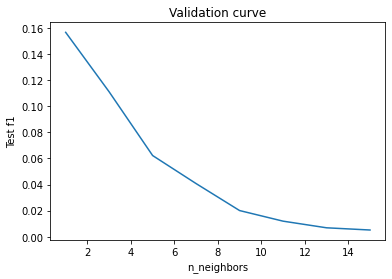

In [28]:
# Рисуем валидационную кривую
# По оси х --- значения гиперпараметров (param_n_neighbors)
# По оси y --- значения метрики (mean_test_score)

import matplotlib.pyplot as plt
results_df = pd.DataFrame(knn_grid.cv_results_)
plt.plot(results_df['param_n_neighbors'], results_df['mean_test_score'])

# Подписываем оси и график
plt.xlabel('n_neighbors')
plt.ylabel('Test f1')
plt.title('Validation curve')
plt.show()

Учитывая структуру датасета удивляться не стоит. Похоже на переобучение.

Далее выберем метрику в методе KNN

In [53]:
from sklearn.model_selection import GridSearchCV
knn_params = {'p': np.linspace(1,10,10)}
knn_1 = KNeighborsClassifier(n_neighbors=1, weights = 'distance', n_jobs = -1)
knn_grid = GridSearchCV(knn_1, 
                        knn_params, 
                        scoring='f1',
                        cv=kf)
knn_grid.fit(X1_train, y1_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=12, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=-1,
                                            n_neighbors=1, p=2,
                                            weights='distance'),
             iid='deprecated', n_jobs=None,
             param_grid={'p': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [54]:
knn_grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=4.0,
                     weights='distance')

In [55]:
knn_grid.best_score_

0.15402652776697828

In [56]:
knn_grid.best_params_

{'p': 4.0}

Вывод: Самым эффективным из рассмотренных оказался knn-метод при 1 ближайшем соседе, основанный на метрике минковского с весами, зависящими от расстояния при p = 4, дающий 15% процентов точности.